<h1 style="text-align:center;font-size:30px;" > MERCEDES-BENZ GREENER MANUFACTURING</h1>

## Introduction

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.





## Project overview

1. In an automobile industry,there is a testing phase for every vehicle
that comes out from production manufacturing. Safety and reliable
testing is a crucial part in the automobile manufacturing process.

2. The Mercedes -Benz automobile industry every day manufactures a
huge rate of producing vehicles and finally sends to the testing phase
at the final stage in production. Every possible vehicle combination
must undergo a test bench to ensure the vehicle is robust enough to
keep passengers safe and withstand in daily use. More tests result in
more time spent on the test stand, increasing costs for Mercedes and
generating carbon dioxide, a polluting greenhouse gas.

# Objective of the project

The main objective of this project is to optimize/reduce the testing time
process of every production vehicle that comes under the test bench. By
this optimization it certainly decreases the Carbon dioxide emission
associated with the testing procedure.


# Machine Learning Problem Formulation:

The above problem can be solve using Classical Machine Learning
techniques to predict the time(target variable) that car will spend on the test
bench based on the vehicle configuration.(Independent Features)
1. The type of problem is a supervised learning problem and the model
can learn from the labelled data.
2. It is an example of a Machine Learning Regression task thus it should
predict the result in a continuous target variable.(time duration of test
bench).


# Performance Metrics:

Since it is a regression problem a key performance metric can be used
as
1. R^2(coefficient of determination).


# Data source:
Mercedes Benz posted the above problem as csv data format in kaggle
platform.

Link :https://www.kaggle.com/c/mercedes-benz-greener-manufacturing

#Data Overview:
The data provided in two csv file formats such as train.csv and test.csv.
1. There are about 386 total features and represented as x0,x1,x2….x386
and each features are anonymized meaning as not physically
represented like configuration options such as suspension setting,
adaptive cruise control, all-wheel drive,together define a car model.
2. The total features is consist of two format
a. Categorical variable (8 categorical features)
b. Numerical binary variable.
3. The product ID columns (unique configuration of vehicle ID).

## Loading the libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import OneHotEncoder
import pickle
from itertools import combinations
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import pearsonr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import prettytable
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold,KFold
from sklearn.metrics import r2_score
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the Data set

In [8]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [93]:
train_data=pd.read_csv("/content/drive/My Drive/train.csv")
train_data.head(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(4209, 378)

## Pre-processing of Train dataset

### Description of the dataset

In [ ]:
train_data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,0.142789,0.002613,0.086957,0.020670,0.001901,0.004989,0.682585,0.032549,0.043003,0.004514,0.232359,0.011167,0.000238,0.005464,0.232359,0.004514,0.232359,0.033262,0.000238,0.000713,0.011404,0.000238,0.072226,0.011404,0.253267,0.597292,0.012830,0.022333,...,0.022333,0.047517,0.0,0.947256,0.044904,0.338798,0.297220,0.054170,0.002138,0.202899,0.380375,0.179853,0.001188,0.426942,0.031837,0.076503,0.966025,0.520314,0.753861,0.002851,0.002851,0.001188,0.051794,0.062723,0.000475,0.006652,0.014255,0.000475,0.019244,0.227370,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,0.349899,0.051061,0.281805,0.142294,0.043561,0.070467,0.465526,0.177475,0.202888,0.067043,0.422387,0.105093,0.015414,0.073729,0.422387,0.067043,0.422387,0.179341,0.015414,0.026691,0.106192,0.015414,0.258893,0.106192,0.434934,0.490501,0.112552,0.147782,...,0.147782,0.212768,0.0,0.223549,0.207117,0.473357,0.457089,0.226379,0.046198,0.402205,0.485537,0.384110,0.034450,0.494693,0.175586,0.265832,0.181186,0.499647,0.430812,0.053325,0.053325,0.034450,0.221637,0.242492,0.021796,0.081300,0.118555,0.021796,0.137399,0.419183,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000

### Checking wheather the dataset contain the Null values

In [ ]:
print("Null value in the dataset:",len(train_data[train_data.isnull().any(axis=1)]))

Null value in the dataset: 0


1. In the above dataset there is no NULL values in all the features.
2. Thus every columns filled by the number and categorical values.


### Checking whether the Duplicate ID is present in the Dataset

In [ ]:
print("No. of Duplicates ID in the dataset:",(len(train_data["ID"])-len(train_data["ID"].drop_duplicates())))

No. of Duplicates ID in the dataset: 0


1. The above dataset has no duplicate ID 
2. so there is unique categories of vechicle id is provided in the dataset

## Finding how many numerical binary features and categorical features

In [ ]:
data=train_data.drop(["ID","y"],axis=1)

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
num_binary_feat=data.select_dtypes(include="int").columns
cat_feat =data.select_dtypes(include="object").columns
print('Numerical feature size: {}'.format(len(num_binary_feat)))
print('Categorical feature size: {} '.format(len(cat_feat)))


Numerical feature size: 368
Categorical feature size: 8 


### Observations:

From here we can conclude that in the dataset we have 368 numerical binary features and 8 categorical features


# Performing Exploratory Data Analysis on train data

Exploratory Data Analysis is statical analysis perform in the data which can know about the characteristic of data,distributions,visualization of data in many kind of plots. This gives the data insights before applying into the modelling.

Here we are exploring the Data and visualize into three parts.

part 1
1. Categorical variable (Analysis)
2. cateorical variable (visualization)

part2
3. Numerical binary varible (Analysis)
4. Numerical binary variable(visualization)

part 3
5. Target y output (Analysis)
6. Target y output(Visualization)

## Part 1 (Analyzing and visualization of categorical variable)

### Checking the unique categories items and top count of category values present in the Categorical variables

In [ ]:
# category 1
print("Number of unique categorical values in X0:",len(np.unique(train_data["X0"])))
print("The unique set of categories are:",np.unique(train_data["X0"]))
print("The Top five counts of the categorical values:",train_data.X0.value_counts().head())
print("-"*150)
# category 2
print("Number of unique categorical values in X1:",len(np.unique(train_data["X1"])))
print("The unique set of categories are:",np.unique(train_data["X1"]))
print("The Top five counts of the categorical values:",train_data.X1.value_counts().head())
print("-"*150)
# category 3
print("Number of unique categorical values in X2:",len(np.unique(train_data["X2"])))
print("The unique set of categories are:",np.unique(train_data["X2"]))
print("The Top five counts of the categorical values:",train_data.X2.value_counts().head())
print("-"*150)
# category 4
print("Number of unique categorical values in X3:",len(np.unique(train_data["X3"])))
print("The unique set of categories are:",np.unique(train_data["X3"]))
print("The Top five counts of the categorical values:",train_data.X3.value_counts().head())
print("-"*150)
# category 5
print("Number of unique categorical values in X4:",len(np.unique(train_data["X4"])))
print("The unique set of categories are:",np.unique(train_data["X4"]))
print("The Top five counts of the categorical values:",train_data.X4.value_counts().head())
print("-"*150)
# category 6
print("Number of unique categorical values in X5:",len(np.unique(train_data["X5"])))
print("The unique set of categories are:",np.unique(train_data["X5"]))
print("The Top five counts of the categorical values:",train_data.X5.value_counts().head())
print("-"*150)
# category 7
print("Number of unique categorical values in X6:",len(np.unique(train_data["X6"])))
print("The unique set of categories are:",np.unique(train_data["X6"]))
print("The Top five counts of the categorical values:",train_data.X6.value_counts().head())
print("-"*150)
# category 8
print("Number of unique categorical values in X8:",len(np.unique(train_data["X8"])))
print("The unique set of categories are:",np.unique(train_data["X8"]))
print("The Top five counts of the categorical values:",train_data.X8.value_counts().head())
print("-"*150)

Number of unique categorical values in X0: 47
The unique set of categories are: ['a' 'aa' 'ab' 'ac' 'ad' 'af' 'ai' 'aj' 'ak' 'al' 'am' 'ao' 'ap' 'aq' 'as'
 'at' 'au' 'aw' 'ax' 'ay' 'az' 'b' 'ba' 'bc' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
The Top five counts of the categorical values: z     360
ak    349
y     324
ay    313
t     306
Name: X0, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
Number of unique categorical values in X1: 27
The unique set of categories are: ['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']
The Top five counts of the categorical values: aa    833
s     598
b     592
l     590
v     408
Name: X1, dtype: int64
--------------------------------------------------------------------------------------------------------------------------

### Bar plot visualization of the categorical variable

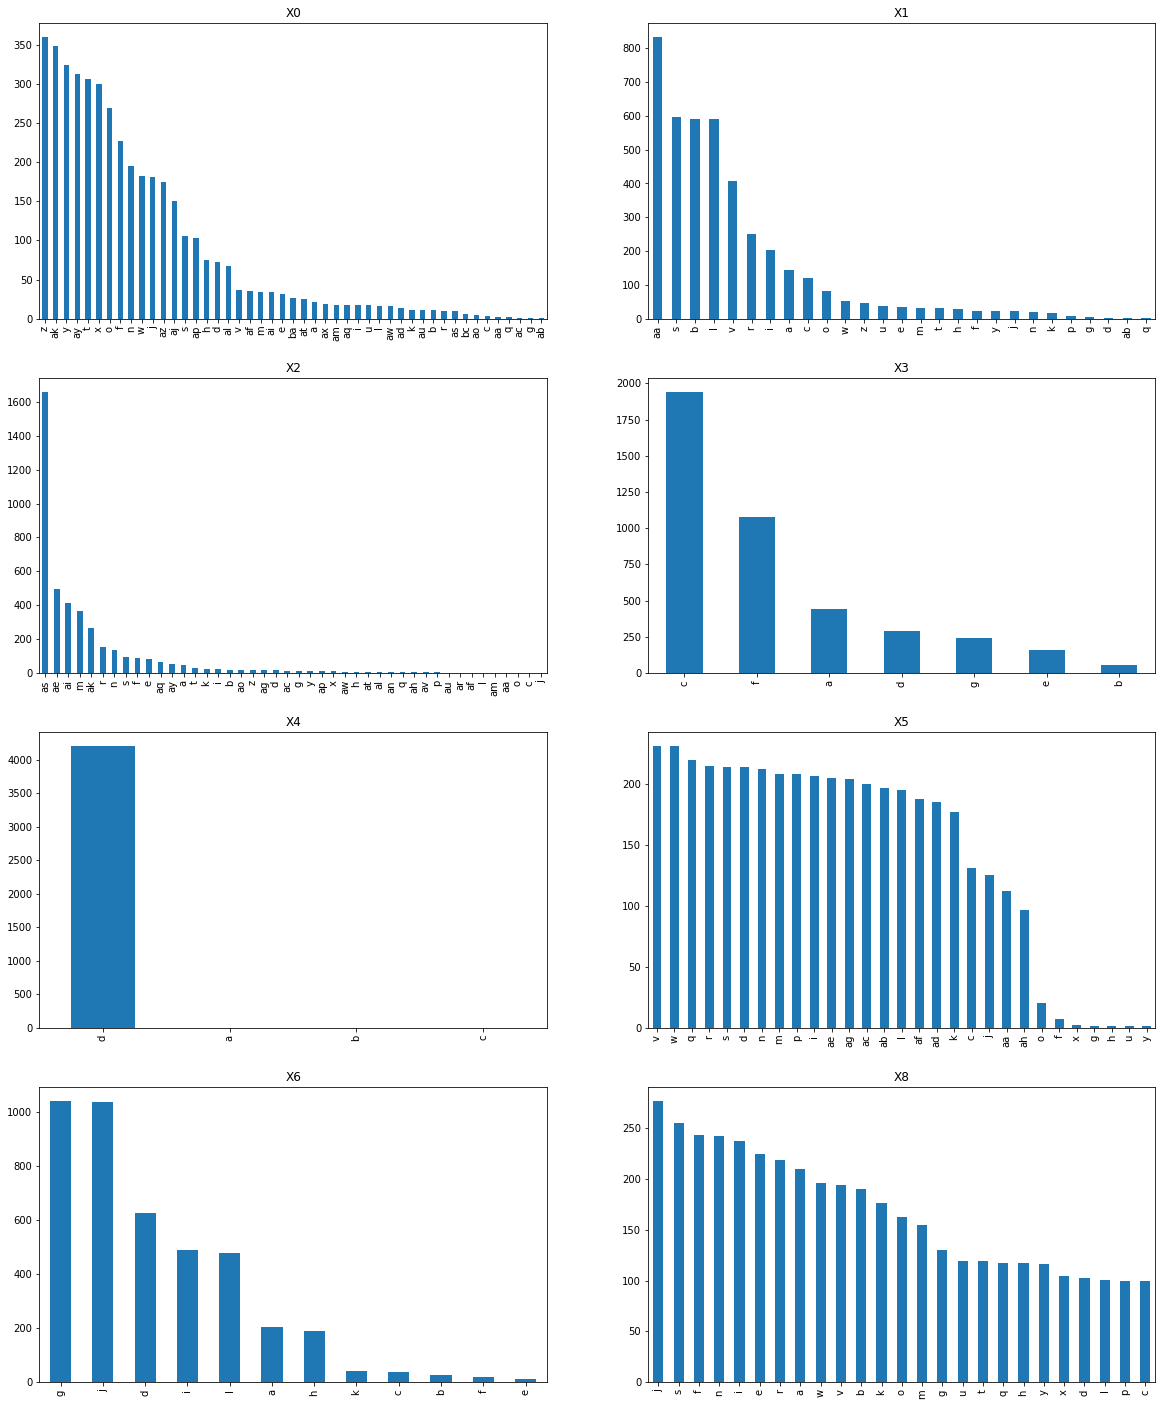

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
train_data.X0.value_counts().plot(kind="bar",title="X0")
plt.subplot(4,2,2)
train_data.X1.value_counts().plot(kind="bar",title="X1")
plt.subplot(4,2,3)
train_data.X2.value_counts().plot(kind="bar",title="X2")
plt.subplot(4,2,4)
train_data.X3.value_counts().plot(kind="bar",title="X3")
plt.subplot(4,2,5)
train_data.X4.value_counts().plot(kind="bar",title="X4")
plt.subplot(4,2,6)
train_data.X5.value_counts().plot(kind="bar",title="X5")
plt.subplot(4,2,7)
train_data.X6.value_counts().plot(kind="bar",title="X6")
plt.subplot(4,2,8)
train_data.X8.value_counts().plot(kind="bar",title="X8")
plt.savefig('b.png')

## observation

1. The above plots shows the count of each category present in the each categorical features.

2. It is same like histogram plot we can about frequency of each category occurs in categorical features.

3. This plot gives more intutions that which category present high in range and which category present low in range.

## Ploting scatterplot, Box plot and Violin plot on various categorical features

For X0 categorical feature

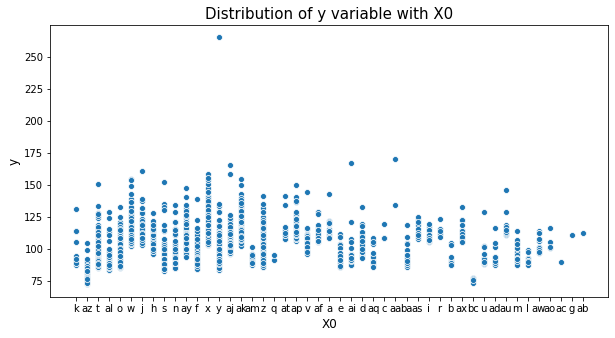

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="X0", y="y",data=train_data);
plt.xlabel("X0", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X0", fontsize=15)
plt.show()
plt.savefig('c.jpg')

### Observations:

1. The above plot represent the categorical scatter plot which is able to represent like how the categorical values distributed with corresponding output variable.

2. The X-axis represent the categories and y axis represent output variable.

3. This plot helps to visualize the outlier of output variable with corresponding category value present in the categorical features.

4. In the above plot "y" category  of which one datapoint present faraway from normally distributed of that category and we can consider this as an outlier of that category.

For X1 categorical features

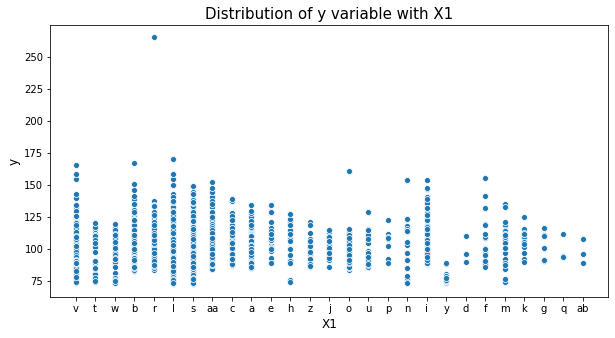

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='X1',y='y', data=train_data)
plt.xlabel("X1", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X1", fontsize=15)
plt.show()

### Observations:

1. The above plot represent the categorical scatter plot which is able to represent like how the categorical values distributed with corresponding output variable.

2. The X-axis represent the categories and y axis represent output variable.

3. This plot helps to visualize the outlier of output variable with corresponding category value present in the categorical features.

4. In the above plot "r" category  of which one datapoint present faraway from normally distributed of that category and we can consider this as an outlier of that category.

for x2 categorical feature

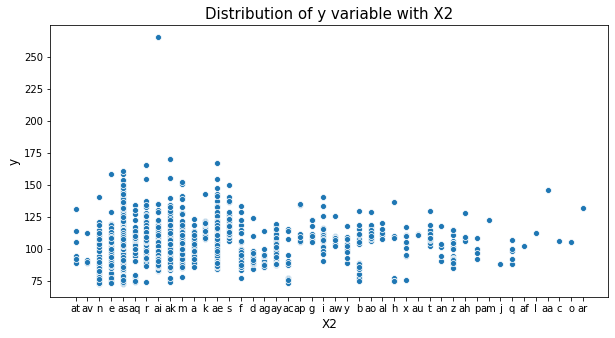

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="X2", y="y",data=train_data);
plt.xlabel("X2", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X2", fontsize=15)
plt.show()

### Observations:

1. The above plot represent the categorical scatter plot which is able to represent like how the categorical values distributed with corresponding output variable.

2. The X-axis represent the categories and y axis represent output variable.

3. This plot helps to visualize the outlier of output variable with corresponding category value present in the categorical features.

4. In the above plot "ai" category  of which one datapoint present faraway from normally distributed of that category and we can consider this as an outlier of that category.

## Box plot

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a verticle line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.

for x3 categorical feature

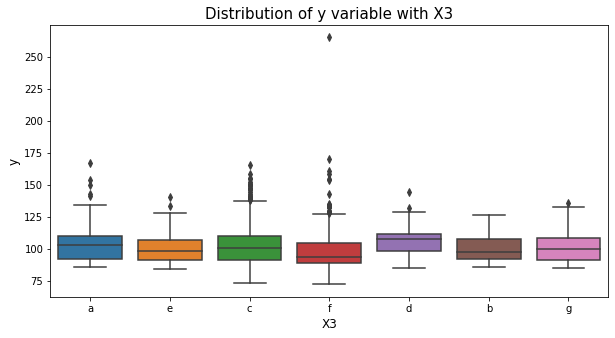

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="X3", y="y",data=train_data);
plt.xlabel("X3", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X3", fontsize=15)
plt.show()

### Observation:

1. The above plot represent each categories are distributed uniformly in overlap with each other.

2. Most of the categories lies in the range of 85 to 120 values of output variable.

3. But in category "f" which one data point lies faraway from normally distributed.Here we can conclude that it is an outlier

for x4 categorical feature

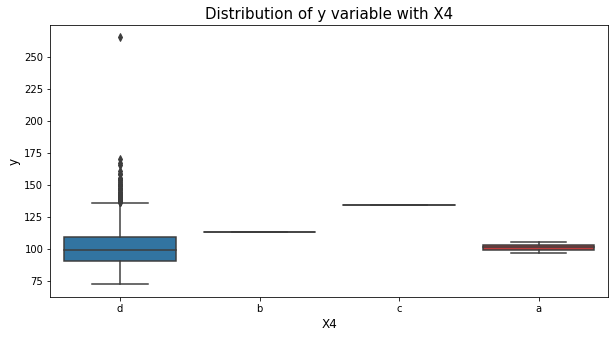

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="X4", y="y",data=train_data);
plt.xlabel("X4", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X4", fontsize=15)
plt.show()

### Observation:

1. The above plot shows the "d" category contain most in the features.which it mostly distributed in the range of 90 to 110 range of values.

2. The category "b" and "c" are present with few in numbers and mostly at the point of 120 and 130 output value respectively.


for x5 categorical variable

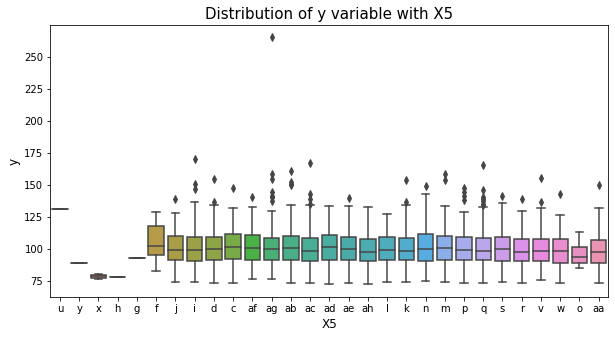

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="X5", y="y",data=train_data);
plt.xlabel("X5", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X5", fontsize=15)
plt.show()

### Observation:

1. The above plot represent most of the categorical values 85 to 120 output values.

2. This features shows that most of the features occurs and uniformly distributed and we can see some of the features which present in few in number.


## Violin plot

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high. A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude.

for x6 categorical variable

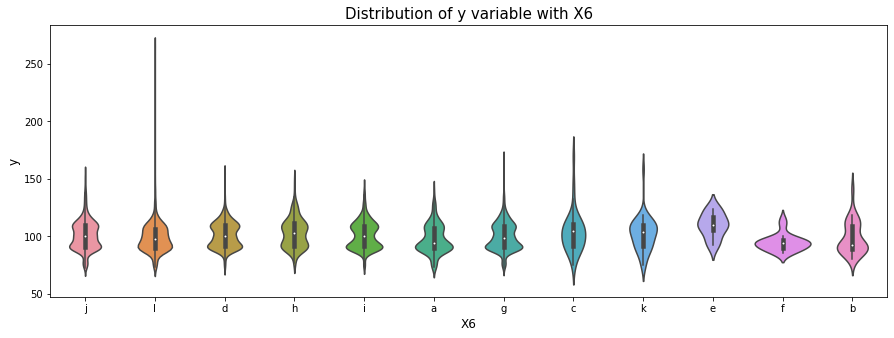

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(x="X6", y="y",data=train_data);
plt.xlabel("X6", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X6", fontsize=15)
plt.show()

## Observation:

1. The plot which represent the most of the categories PDF curve lies under the range of 75 to 125 output y variables.

2. But we can see that category "i" which is highly skewed and this shows that this category have the outlier with respect to output variable y.

for x8 categorical features

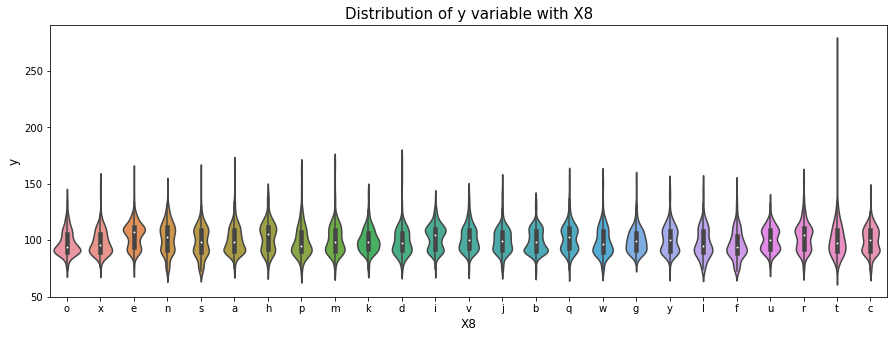

In [ ]:
plt.figure(figsize=(15,5))
sns.violinplot(x="X8", y="y",data=train_data);
plt.xlabel("X8", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+"X8", fontsize=15)
plt.show()

## Observation:

1. The above plot show all the categorical values are present with uniformly and almost PDF curve lies in the range of 75 to 125 values of output y variables.

2. But we can see that category "t" which is highly skewed and this shows that this category have the outlier with respect to output variable y.

# Part 2 (Analyzing and visualization of Numerical Binary data)

Analysis on Numerical binary features

In [ ]:
constant_binary_number=0
variable_binary_number=0
constant_binary_features=[]
variable_binary_features=[]

for col in train_data.columns:
  if col not in ["ID","y","X0","X1","X2","X3","X4","X5","X6","X8"]:
      if int(1) in train_data[col].values:
        variable_binary_number+=1
        variable_binary_features.append(col)
      elif int(0) in train_data[col].values:
        constant_binary_number+=1
        constant_binary_features.append(col)
constant_binary_number
print("The number of columns which contain single binary value as zero only:",constant_binary_number)
print("The features columns is:",np.array(constant_binary_features))
print("_"*150)
print("The number of columns which contain both the binary values:",variable_binary_number)
print("The features columns is:",np.array(variable_binary_features))

The number of columns which contain single binary value as zero only: 12
The features columns is: ['X11' 'X93' 'X107' 'X233' 'X235' 'X268' 'X289' 'X290' 'X293' 'X297'
 'X330' 'X347']
______________________________________________________________________________________________________________________________________________________
The number of columns which contain both the binary values: 356
The features columns is: ['X10' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22'
 'X23' 'X24' 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33' 'X34' 'X35'
 'X36' 'X37' 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45' 'X46' 'X47'
 'X48' 'X49' 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57' 'X58' 'X59'
 'X60' 'X61' 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69' 'X70' 'X71'
 'X73' 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82' 'X83' 'X84'
 'X85' 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X94' 'X95' 'X96' 'X97'
 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105' 'X106' 'X10

## Visualizing the binary features using bar garph

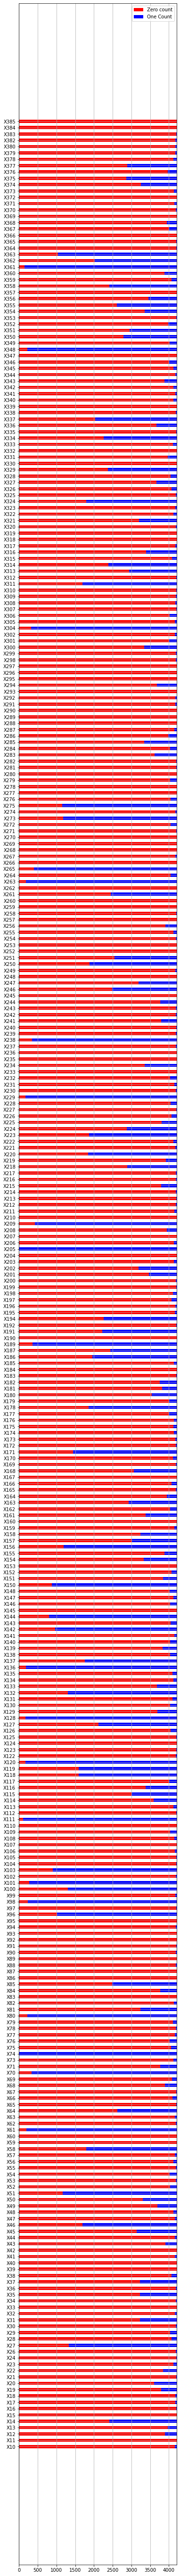

In [ ]:
one_count=[]
zero_count=[]
width=0.5
data=train_data.drop(["ID","y","X0","X1","X2","X3","X4","X5","X6","X8"],axis=1)
num=len(data.columns)
index=np.arange(num)
for col in data.columns:
      one_count.append((data[col]==1).sum())
      zero_count.append((data[col]==0).sum())
plt.figure(figsize=(6,100))
y1=plt.barh(index,zero_count,width,color="red")
y2=plt.barh(index,one_count,width,left=zero_count,color="blue")
plt.yticks(index,data.columns)
plt.legend((y1[0],y2[0]), ('Zero count', 'One Count'))
plt.grid()
plt.savefig('a.jpg')

## Observation:

1. The above plot is the bar plot which represent frequency count of numerical binary values in the dataset of corresponding features.

2. By this plot we can able to find the majority and minority of values of occurance of numerical binary values in corresponding numerical binary features.

3. The X-axis represent the index of the datapoint and y-axis represent the all numerical binary features contain the dataset.

# Part 3 (Analyzing and visualizing the output variable)
## Analyzing the output variable

In [ ]:
train_data.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

## Visualize into various plot of Target output variable

## Scatter plot 

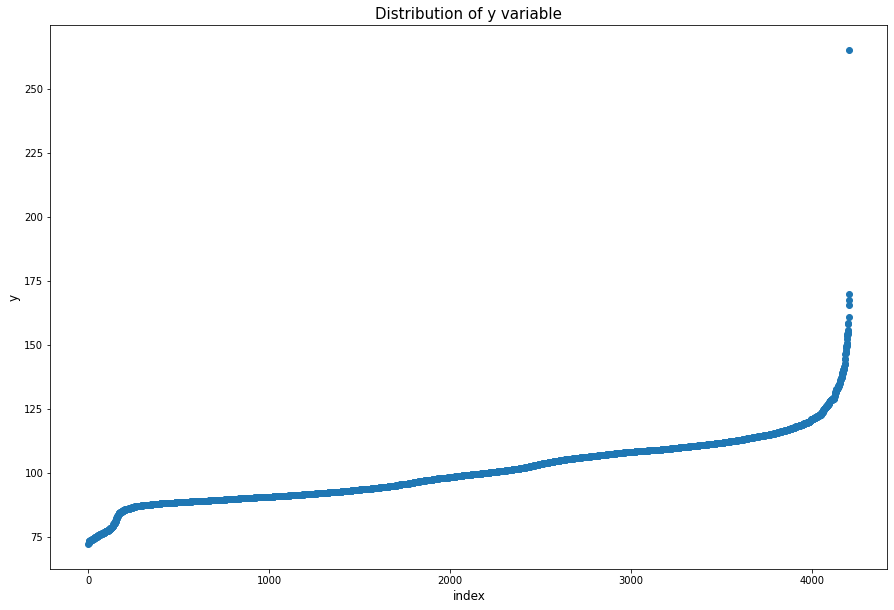

In [ ]:
plt.figure(figsize=(15,10))
index=len(train_data)
plt.scatter(x=range(index), y=np.sort(train_data["y"].values))
plt.xlabel("index", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable", fontsize=15)
plt.show()

### observations:

1. The above plot is the Scatter plot which x-axis contain the index of the datapoint and y-axis contain the output variable.

2. From this plot we can colnclude that most of the value of output varaibele lies between the range of 80 to 120 values.

3. we can also see some of the outlier points faraway from the group of values.



## Histogram PDF function

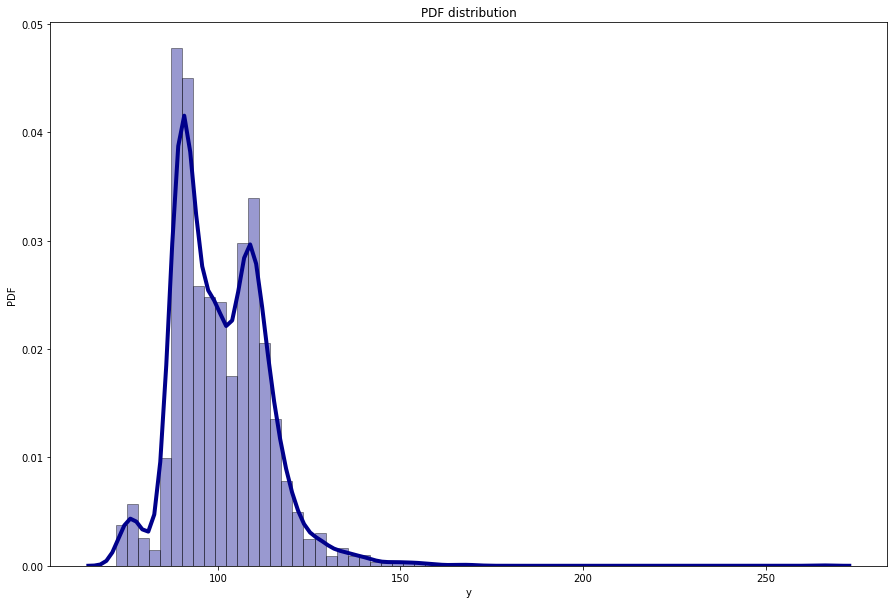

In [ ]:
nbin=int(np.sqrt(4209))# sqrt of number of datapoints
plt.figure(figsize=(15,10))
sns.distplot(train_data['y'], hist=True, kde=True, 
             bins=nbin, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.ylabel("PDF")
plt.title("PDF distribution")
plt.show()

### Observations:

1. The above plot is PDF distributions of output variable and the plot shows there is rise of two peak cuvrve. This can be conclude that the distribution of the output variable are following the Gaussian distribution.

2. The plot which provides both the histogram plot and pdf curve and which give more intuition on distributions

3. The plot show most of the values in 80 and 120 values and more values present with this value region.

4. The pdf curve is highly skewed at right this shows that few values lies more than the value of 250.

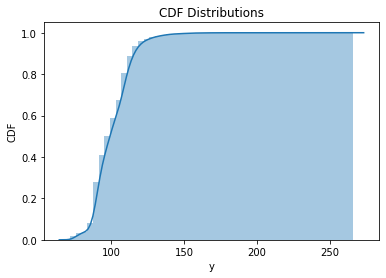

In [ ]:
#https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
x = train_data["y"].values
kwargs = {'cumulative': True}
plt.xlabel("y")
plt.ylabel("CDF")
plt.title("CDF Distributions")
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

## Observations:

1. The plot represent the Cdf of the output y variables.

2. This conclude that 95% of the output variable lies less than 120 

3. And very few variables are lies beyond the range of 150.

Let do some small analysis from lookin on above visualizations:

In [ ]:
low_range=0
inter_range=0
high_range=0
for i in train_data["y"].values:
  if i<80:
    low_range+=1
  elif i>80 and i<150:
    inter_range+=1
  else:
    high_range+=1


In [ ]:
print("The number of datapoint with ouput values less than 80 value threshold:",low_range)
print("The number of datapoint with with inter range value of 80 to 150 value threshold: ",inter_range)
print("The number of datapoint with ouput values more than 150 value threshold:",high_range)

The number of datapoint with ouput values less than 80 value threshold: 142
The number of datapoint with with inter range value of 80 to 150 value threshold:  4052
The number of datapoint with ouput values more than 150 value threshold: 15


## Conclusion of EDA:

1.From the above analysis of the data we can conlcude that the dataset has an outlier and some of the columns which are same values of in entire columns in numerical binary features.

2.By the above conclusion we are removing those outlier points and repeated values in the numerical binary features.


3.By the removal the of model will perform well by eliminating the features collinearity and outlier.

## Removal of the same values contain in the numerical binary featues

In [94]:
removal_col=[]
for col in train_data.columns:
  if col not in ["ID","X0","X1","X2","X3","X4","X5","X6","X8"]:
    if train_data[col].var()==0:
      removal_col.append(col)

removal_col

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [95]:
train_data.drop(removal_col, axis=1,inplace=True)
train_data.shape

(4209, 366)

## Removal of outlier points

In [96]:
#https://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data#
def outlier(points, thresh = 3.5):
    points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation # we are doing the modified z score values
    return points[modified_z_score > thresh]

In [97]:
outliers= outlier(train_data["y"])#printing the outlier points from the output variable
outliers=outliers.flatten()
outliers

array([146.83, 150.43, 169.91, 154.87, 147.72, 265.32, 158.53, 154.43,
       149.63, 160.87, 150.89, 152.32, 167.45, 154.16, 148.94, 158.23,
       153.51, 147.22, 146.3 , 165.52, 155.62, 149.52])

In [98]:
for i in outliers:
  train_data.drop(train_data[train_data["y"]==i].index,inplace=True)# Dropping the outliers

In [99]:
print("The shape of the data with removed outlier points:",train_data.shape)

The shape of the data with removed outlier points: (4187, 366)


### Loading the Test data

In [100]:
test_data=pd.read_csv("/content/drive/My Drive/test (3).csv")
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [101]:
print("The shape of the Test Dataset:",test_data.shape)

The shape of the Test Dataset: (4209, 377)


In [102]:
test_data.drop(removal_col, axis=1,inplace=True)
test_data.shape

(4209, 365)

In [103]:
y_train=train_data["y"]
train_data.drop("y",axis=1,inplace=True)

In [104]:
print("The Final train Dataset shape is:",train_data.shape)
print("The Final test Dataset shape is:",test_data.shape)

The Final train Dataset shape is: (4187, 365)
The Final test Dataset shape is: (4209, 365)


#  Feature Engineering 

## Technique 1: Dimensionality reductions techniques using PCA

### convertions of categorical variable into numerical features

1. Label encoding 



In [21]:
label=LabelEncoder()
label_enc=label.fit(train_data["X0"].values)
test_data["X0"]=test_data["X0"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data["X0"] = label.transform(train_data["X0"])
test_data["X0"] = label.transform(test_data["X0"])

#-------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X1"].values)
test_data.loc[:,("X1")]=test_data["X1"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X1")] = label.transform(train_data["X1"])
test_data.loc[:,("X1")] = label.transform(test_data["X1"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X2"].values)
test_data.loc[:,("X2")]=test_data["X2"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X2")] = label.transform(train_data["X2"])
test_data.loc[:,("X2")] = label.transform(test_data["X2"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X3"].values)
test_data.loc[:,("X3")]=test_data["X3"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X3")] = label.transform(train_data["X3"])
test_data.loc[:,("X3")] = label.transform(test_data["X3"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X4"].values)
test_data.loc[:,("X4")]=test_data["X4"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X4")] = label.transform(train_data["X4"])
test_data.loc[:,("X4")] = label.transform(test_data["X4"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X5"].values)
test_data.loc[:,("X5")]=test_data["X5"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X5")] = label.transform(train_data["X5"])
test_data.loc[:,("X5")] = label.transform(test_data["X5"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X6"].values)
test_data.loc[:,("X6")]=test_data["X6"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X6")] = label.transform(train_data["X6"])
test_data.loc[:,("X6")] = label.transform(test_data["X6"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X8"].values)
test_data.loc[:,("X8")]=test_data["X8"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X8")] = label.transform(train_data["X8"])
test_data.loc[:,("X8")] = label.transform(test_data["X8"])

#---------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
train_data.to_csv("label_train.csv",index=False)
test_data.to_csv("label_test.csv",index=False)

In [23]:
X_train_label=pd.read_csv("/content/label_train.csv")
X_test_label=pd.read_csv("/content/label_test.csv")

In [24]:
print("The train label data:",X_train_label.shape)
print("The test label data:",X_test_label.shape)

The train label data: (4187, 365)
The test label data: (4209, 365)


2. frequency encoding

In [47]:
train_feq=train_data.groupby("X0").size()/len(train_data)
train_data["X0"]=[train_feq.loc[i] for i in train_data["X0"].values]
test_data["X0"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X0"].values]
#---------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X1").size()/len(train_data)
train_data["X1"]=[train_feq.loc[i] for i in train_data["X1"].values]
test_data["X1"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X1"].values]

#----------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X2").size()/len(train_data)
train_data["X2"]=[train_feq.loc[i] for i in train_data["X2"].values]
test_data["X2"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X2"].values]

#-----------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X3").size()/len(train_data)
train_data["X3"]=[train_feq.loc[i] for i in train_data["X3"].values]
test_data["X3"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X3"].values]

#------------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X4").size()/len(train_data)
train_data["X4"]=[train_feq.loc[i] for i in train_data["X4"].values]
test_data["X4"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X4"].values]

#------------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X5").size()/len(train_data)
train_data["X5"]=[train_feq.loc[i] for i in train_data["X5"].values]
test_data["X5"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X5"].values]

#------------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X6").size()/len(train_data)
train_data["X6"]=[train_feq.loc[i] for i in train_data["X6"].values]
test_data["X6"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X6"].values]

#-------------------------------------------------------------------------------------------------------------------------------------------

train_feq=train_data.groupby("X8").size()/len(train_data)
train_data["X8"]=[train_feq.loc[i] for i in train_data["X8"].values]
test_data["X8"]=[train_feq.loc[i] if i in train_feq.index else 0 for i in test_data["X8"].values]

#-------------------------------------------------------------------------------------------------------------------------------------------

In [48]:
train_data.to_csv("freq_train.csv",index=False)
test_data.to_csv("freq_test.csv",index=False)

In [49]:
X_train_feq=pd.read_csv("/content/freq_train.csv")
X_test_feq=pd.read_csv("/content/freq_test.csv")

In [50]:
print("The train frequency data:",X_train_feq.shape)
print("The test frequency data:",X_test_feq.shape)

The train frequency data: (4187, 365)
The test frequency data: (4209, 365)


3. Mean encoding

In [79]:
y_mean=train_data.y.mean()
train_mean=train_data.groupby("X0")["y"].mean()
train_data["X0"]=[train_mean.loc[i] for i in train_data["X0"].values]
test_data["X0"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X0"].values]

#------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X1")["y"].mean()
train_data["X1"]=[train_mean.loc[i] for i in train_data["X1"].values]
test_data["X1"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X1"].values]

#-------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X2")["y"].mean()
train_data["X2"]=[train_mean.loc[i] for i in train_data["X2"].values]
test_data["X2"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X2"].values]

#--------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X3")["y"].mean()
train_data["X3"]=[train_mean.loc[i] for i in train_data["X3"].values]
test_data["X3"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X3"].values]

#-------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X4")["y"].mean()
train_data["X4"]=[train_mean.loc[i] for i in train_data["X4"].values]
test_data["X4"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X4"].values]

#--------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X5")["y"].mean()
train_data["X5"]=[train_mean.loc[i] for i in train_data["X5"].values]
test_data["X5"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X5"].values]

#-------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X6")["y"].mean()
train_data["X6"]=[train_mean.loc[i] for i in train_data["X6"].values]
test_data["X6"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X6"].values]

#--------------------------------------------------------------------------------------------------------------------------------------------

train_mean=train_data.groupby("X8")["y"].mean()
train_data["X8"]=[train_mean.loc[i] for i in train_data["X8"].values]
test_data["X8"]=[train_mean.loc[i] if i in train_mean.index else y_mean for i in test_data["X8"].values]

#----------------------------------------------------------------------------------------------------------------------------------------------

In [80]:
y_train=train_data["y"]
train_data.drop("y",axis=1,inplace=True)

In [81]:
train_data.to_csv("mean_train.csv",index=False)
test_data.to_csv("mean_test.csv",index=False)

In [82]:
X_train_mean=pd.read_csv("/content/mean_train.csv")
X_test_mean=pd.read_csv("/content/mean_test.csv")

In [83]:
print("The train mean categorical data:",X_train_mean.shape)
print("The test mean categorical data:",X_test_mean.shape)

The train mean categorical data: (4187, 365)
The test mean categorical data: (4209, 365)


### Features Scaling

### 1. Label encoding

In [25]:
std = StandardScaler()
train_label_std=std.fit_transform(X_train_label.values)
test_label_std=std.transform(X_test_label.values)

### 2. Frequency encoding

In [51]:
std = StandardScaler()
train_feq_std=std.fit_transform(X_train_feq.values)
test_feq_std=std.transform(X_test_feq.values)

### 3.Mean encoding

In [84]:
std = StandardScaler()
train_mean_std=std.fit_transform(X_train_mean.values)
test_mean_std=std.transform(X_test_mean.values)

## Selecting the principal component features which has highly variance explained

### 1. Label encoding

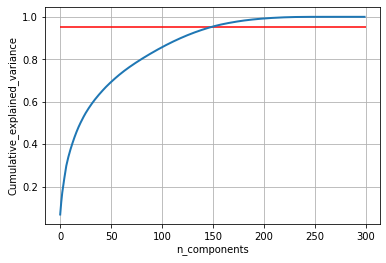

Thus 150 principle component explain about 95 percentage of the variance in feature on train dataset


In [ ]:
pca=PCA(n_components=300)
pca_data = pca.fit_transform(train_label_std)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_); # getting the percentage of variance explained
cum_var_explained = np.cumsum(percentage_var_explained)
for i,j in enumerate(cum_var_explained):
  if np.round(j,2)==0.95:
    feature_select=i

plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.hlines(y =0.95, xmin = 0, xmax = 300, color ='r') 
plt.show()
print("Thus {0} principle component explain about 95 percentage of the variance in feature on train dataset".format(feature_select))

### 2. Frequency encoding

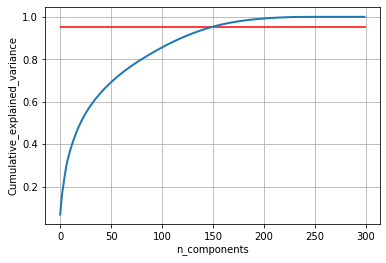

Thus 151 principle component explain about 95 percentage of the variance in feature on train dataset


In [ ]:
pca=PCA(n_components=300)
pca_data = pca.fit_transform(train_feq_std)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_); # getting the percentage of variance explained
cum_var_explained = np.cumsum(percentage_var_explained)
for i,j in enumerate(cum_var_explained):
  if np.round(j,2)==0.95:
    feature_select=i
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.hlines(y =0.95, xmin = 0, xmax = 300, color ='r') 
plt.show()
print("Thus {0} principle component explain about 95 percentage of the variance in feature on train dataset".format(feature_select))

### 3. Mean encoding

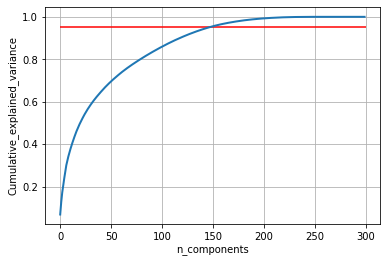

Thus 149 principle component explain about 95 percentage of the variance in feature on train dataset


In [ ]:
pca=PCA(n_components=300)
pca_data = pca.fit_transform(train_mean_std)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);# getting the percentage of variance explained
cum_var_explained = np.cumsum(percentage_var_explained)
for i,j in enumerate(cum_var_explained):
  if np.round(j,2)==0.95:
    feature_select=i


plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.hlines(y =0.95, xmin = 0, xmax = 300, color ='r') 
plt.show()
print("Thus {0} principle component explain about 95 percentage of the variance in feature on train dataset".format(feature_select))

### label encoder

In [26]:
pca=PCA(n_components=150)
pca_train_label=pca.fit_transform(train_label_std)
pca_test_label=pca.transform(test_label_std)

In [27]:
print("The pca reductions of the train label encoding:",pca_train_label.shape)
print("The pca reductions of the test label encoding:",pca_test_label.shape)

The pca reductions of the train label encoding: (4187, 150)
The pca reductions of the test label encoding: (4209, 150)


### frequency encoder

In [52]:
pca=PCA(n_components=151)
pca_train_feq=pca.fit_transform(train_feq_std)
pca_test_feq=pca.transform(test_feq_std)

In [53]:
print("The pca reductions of the train frequency encoding:",pca_train_feq.shape)
print("The pca reductions of the test frequency encoding:",pca_test_feq.shape)

The pca reductions of the train frequency encoding: (4187, 151)
The pca reductions of the test frequency encoding: (4209, 151)


### mean encoder

In [85]:
pca=PCA(n_components=149)
pca_train_mean=pca.fit_transform(train_mean_std)
pca_test_mean=pca.transform(test_mean_std)

In [86]:
print("The pca reductions of the train mean encoding:",pca_train_mean.shape)
print("The pca reductions of the test mean encoding:",pca_test_mean.shape)

The pca reductions of the train mean encoding: (4187, 149)
The pca reductions of the test mean encoding: (4209, 149)


# Model Implementation on Technique 1

## Label encoding

### 1.Lasso Regression with Hyperameter tuning with Grid Search CV

In [28]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
param={"alpha":hyper_value}
model1=Lasso()
grid_cv1 = GridSearchCV(model1, param, cv=12, scoring='r2',return_train_score=True)
grid_cv1.fit(pca_train_label,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37969.597515494606, tolerance: 53.87881263579207
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78729.65214980609, tolerance: 53.90579646692026
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89485.67954098794, tolerance: 54.08901122740229
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185.721725

GridSearchCV(cv=12, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [29]:
#https://stackoverflow.com/questions/54608088/what-is-gridsearch-cv-results-could-any-explain-all-the-things-in-that-i-e-me
result_df=pd.DataFrame(grid_cv1.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

### Plotting of Train score and Test score

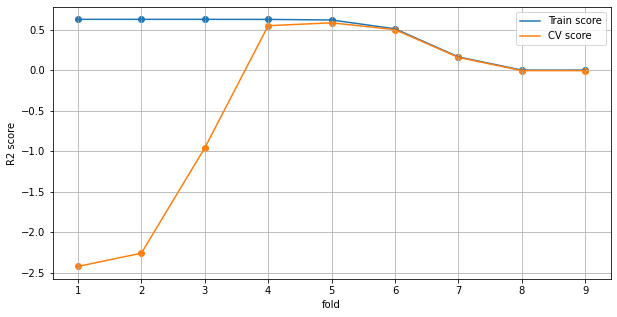

In [30]:
fold= list(range(1,10))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [31]:
print("The best R2 score:",grid_cv1.best_score_)

The best R2 score: 0.584267035278409


#### Training of best paramter

In [ ]:
final_model=grid_cv1.best_estimator_
final_model.fit(pca_train_label,y_train)
predicted=final_model.predict(pca_test_label)

In [ ]:
# submission result csv
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("label_lasso_submission.csv",index=False)

### 2.Linear SVM with Hyper-parameter Tuning 

In [32]:
from sklearn.svm import SVR
pca_label_df=pd.DataFrame(pca_train_label,columns=list(range(0,150)))
y=y_train
X_train,X_cv,Y_train,Y_cv=train_test_split(pca_label_df,y,test_size=0.2)
C=[0.00001,0.0001,0.001,0.01,0.1,1,10]
train_score=[]
cv_score=[]
for i in C:
  reg=SVR(kernel="linear",C=i)
  train=reg.fit(X_train,Y_train)
  train_pred=reg.predict(X_train)
  train_score.append(r2_score(Y_train,train_pred))
  cv_pred=reg.predict(X_cv)
  cv_score.append(r2_score(Y_cv,cv_pred))
  print("The train R2 score is:{},The cv R2 score is :{}".format(r2_score(Y_train,train_pred),r2_score(Y_cv,cv_pred)))

The train R2 score is:0.02207279017122743,The cv R2 score is :0.028280220451134208
The train R2 score is:0.23946584982691133,The cv R2 score is :0.24842216324896838
The train R2 score is:0.5418079948430605,The cv R2 score is :0.5420933103085279
The train R2 score is:0.5946003118631227,The cv R2 score is :0.5847350297376809
The train R2 score is:0.5953322073009895,The cv R2 score is :0.5765588836216489
The train R2 score is:0.5949464559595146,The cv R2 score is :0.5740922829919964
The train R2 score is:0.5948664454929564,The cv R2 score is :0.5740440849485189


### Plotting Train and Test Score

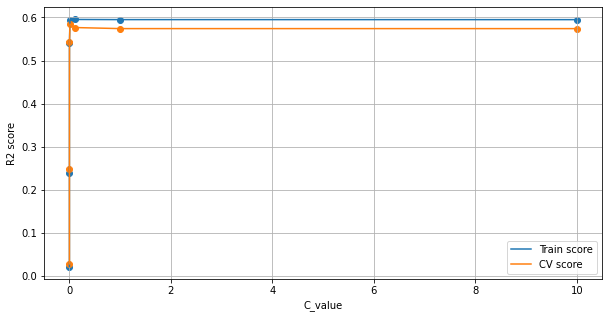

In [33]:
plt.figure(figsize=(10,5))
plt.plot(C,train_score,label='Train score')
plt.plot(C,cv_score,label='CV score')
plt.scatter(C,train_score)
plt.scatter(C, cv_score)
plt.xlabel("C_value")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

### Training the Best Parameter

In [34]:
print("The best score is:",cv_score[3])
reg=SVR(kernel="linear",C=0.01)
train=reg.fit(X_train,Y_train)
test_predict=reg.predict(pca_test_label)
# submission result csv
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=test_predict
submission_df.to_csv("label_SVR_submission.csv",index=False)

The best score is: 0.5847350297376809


## Frequency encoding

1.Lasso Regression with Hyperameter tuning with Grid Search CV

In [ ]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
param={"alpha":hyper_value}
model1=Lasso()
grid_cv = GridSearchCV(model1, param, cv=12, scoring='r2',return_train_score=True)
grid_cv.fit(pca_train_feq,y_train)

In [ ]:
result_df=pd.DataFrame(grid_cv.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

### ploting the train and test score

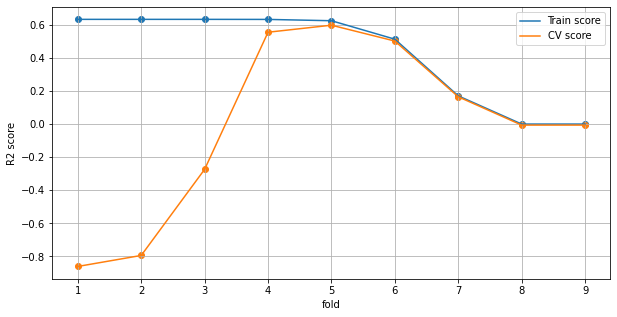

In [ ]:
fold= list(range(1,10))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("The best R2 score:",grid_cv.best_score_)

The best R2 score: 0.5973926544203728


### Training with the best Parameter

In [ ]:
final_model=grid_cv.best_estimator_
final_model.fit(pca_train_feq,y_train)
predicted=final_model.predict(pca_test_feq)

In [ ]:
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("feq_lasso_submission.csv",index=False)

2. Linear SVM with hyper-parameter tuning 

In [54]:
from sklearn.svm import SVR
y=y_train
X_train,X_cv,Y_train,Y_cv=train_test_split(pca_train_feq,y,test_size=0.2)
C=[0.00001,0.0001,0.001,0.01,0.1,1,10]
train_score=[]
cv_score=[]
for i in C:
  reg=SVR(kernel="linear",C=i)
  train=reg.fit(X_train,Y_train)
  train_pred=reg.predict(X_train)
  train_score.append(r2_score(Y_train,train_pred))
  cv_pred=reg.predict(X_cv)
  cv_score.append(r2_score(Y_cv,cv_pred))
  print("The train R2 score is:{},The cv R2 score is :{}".format(r2_score(Y_train,train_pred),r2_score(Y_cv,cv_pred)))

The train R2 score is:0.02025326801442051,The cv R2 score is :0.0036614133793912984
The train R2 score is:0.23245546105260673,The cv R2 score is :0.21785466618227434
The train R2 score is:0.5409351895390292,The cv R2 score is :0.5296374502454457
The train R2 score is:0.6038203589525328,The cv R2 score is :0.5842107930691944
The train R2 score is:0.60434494506206,The cv R2 score is :0.5020756317998551
The train R2 score is:0.6034564100427423,The cv R2 score is :0.237978624692752
The train R2 score is:0.6037202682763023,The cv R2 score is :0.14109378451849763


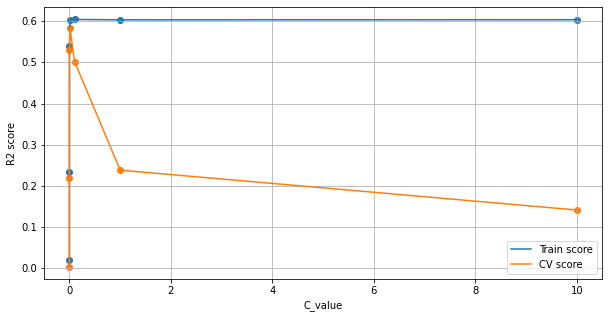

In [55]:
plt.figure(figsize=(10,5))
plt.plot(C,train_score,label='Train score')
plt.plot(C,cv_score,label='CV score')
plt.scatter(C,train_score)
plt.scatter(C, cv_score)
plt.xlabel("C_value")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

### Training with best parameter

In [56]:
print("The best score:",cv_score[3])
reg=SVR(kernel="linear",C=0.01)
train=reg.fit(X_train,Y_train)
test_predict=reg.predict(pca_test_feq)
# submission result csv
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=test_predict
submission_df.to_csv("feq_SVR_submission.csv",index=False)

The best score: 0.5842107930691944


# Mean Encoding

1.Lasso Regression with Hyperameter tuning with Grid Search CV

In [ ]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
param={"alpha":hyper_value}
model1=Lasso()
grid_cv = GridSearchCV(model1, param, cv=12, scoring='r2',return_train_score=True)
grid_cv.fit(pca_train_mean,y_train)

In [ ]:
result_df=pd.DataFrame(grid_cv.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

### Ploting the Train and Test Score

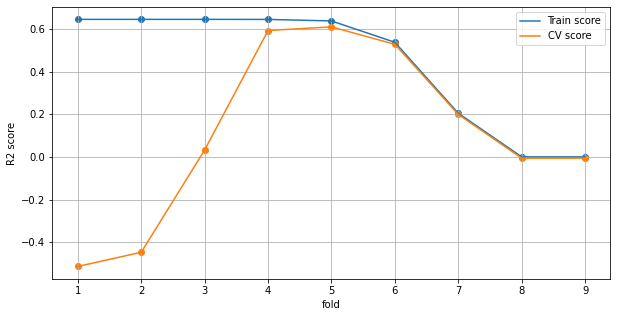

In [ ]:
fold= list(range(1,10))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("The best R2 score:",grid_cv.best_score_)

The best R2 score: 0.6094749181193994


### Training the best parameter

In [ ]:
final_model=grid_cv.best_estimator_
final_model.fit(pca_train_mean,y_train)
predicted=final_model.predict(pca_test_mean)

In [ ]:
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("mean_lasso_submission.csv",index=False)

### 2. Linear SVM with hyper-parameter tuning

In [87]:
from sklearn.svm import SVR
y=y_train
X_train,X_cv,Y_train,Y_cv=train_test_split(pca_train_mean,y,test_size=0.2)
C=[0.00001,0.0001,0.001,0.01,0.1,1,10]
train_score=[]
cv_score=[]
for i in C:
  reg=SVR(kernel="linear",C=i)
  train=reg.fit(X_train,Y_train)
  train_pred=reg.predict(X_train)
  train_score.append(r2_score(Y_train,train_pred))
  cv_pred=reg.predict(X_cv)
  cv_score.append(r2_score(Y_cv,cv_pred))
  print("The train R2 score is:{},The cv R2 score is :{}".format(r2_score(Y_train,train_pred),r2_score(Y_cv,cv_pred)))

The train R2 score is:0.02444046260559596,The cv R2 score is :0.010715696640136163
The train R2 score is:0.2778102918245593,The cv R2 score is :0.2507124634286356
The train R2 score is:0.5809958121446539,The cv R2 score is :0.5198789776303494
The train R2 score is:0.6284295632036232,The cv R2 score is :0.5514128921870513
The train R2 score is:0.6306694903777401,The cv R2 score is :0.5493520919380367
The train R2 score is:0.6306505747433294,The cv R2 score is :0.5409753248820326
The train R2 score is:0.630290014861153,The cv R2 score is :0.5355708973711837


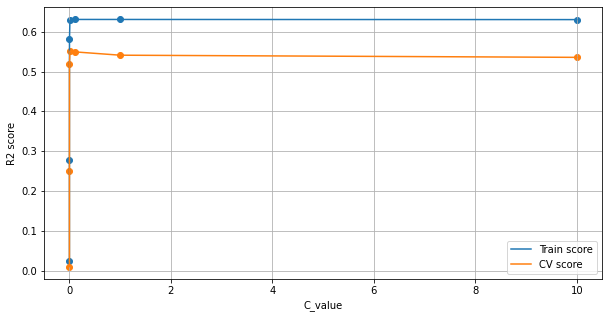

In [90]:
plt.figure(figsize=(10,5))
plt.plot(C,train_score,label='Train score')
plt.plot(C,cv_score,label='CV score')
plt.scatter(C,train_score)
plt.scatter(C, cv_score)
plt.xlabel("C_value")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [91]:
print("The best score is:",cv_score[3])
reg=SVR(kernel="linear",C=0.01)
train=reg.fit(X_train,Y_train)
test_predict=reg.predict(pca_test_mean)
# submission result csv
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=test_predict
submission_df.to_csv("mean_SVR_submission.csv",index=False)

The best score is: 0.5514128921870513


In [92]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["S.no.","Model","R2score","Private_score","Public_score"]
x.add_row(["1","lasso+label_encoding","0.5842","0.51463","0.51093"])
x.add_row(["2ng","linear_svm+label_encoding","0.5847","0.48548","0.48251"])
x.add_row(["3","lasso+frequency_encoding","0.5973","0.52039","0.51375"])
x.add_row(["4","linear_svm+frequency_encoding","0.58421","0.49519","0.50321"])
x.add_row(["5","lasso+mean_encoding","0.60947","0.52832","0.52437"])
x.add_row(["6","linear_svm+mean_encoding","0.55141","0.49433","0.49805"])
print(x)

+-------+-------------------------------+---------+---------------+--------------+
| S.no. |             Model             | R2score | Private_score | Public_score |
+-------+-------------------------------+---------+---------------+--------------+
|   1   |      lasso+label_encoding     |  0.5842 |    0.51463    |   0.51093    |
|  2ng  |   linear_svm+label_encoding   |  0.5847 |    0.48548    |   0.48251    |
|   3   |    lasso+frequency_encoding   |  0.5973 |    0.52039    |   0.51375    |
|   4   | linear_svm+frequency_encoding | 0.58421 |    0.49519    |   0.50321    |
|   5   |      lasso+mean_encoding      | 0.60947 |    0.52832    |   0.52437    |
|   6   |    linear_svm+mean_encoding   | 0.55141 |    0.49433    |   0.49805    |
+-------+-------------------------------+---------+---------------+--------------+


# Technique 2: Analysis on features and removing the features based low variance and highly correlations between them and adding two way and three way combination interactive features in them

### Label encoding

In [105]:
label=LabelEncoder()
label_enc=label.fit(train_data["X0"].values)
test_data["X0"]=test_data["X0"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data["X0"] = label.transform(train_data["X0"])
test_data["X0"] = label.transform(test_data["X0"])

#-------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X1"].values)
test_data.loc[:,("X1")]=test_data["X1"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X1")] = label.transform(train_data["X1"])
test_data.loc[:,("X1")] = label.transform(test_data["X1"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X2"].values)
test_data.loc[:,("X2")]=test_data["X2"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X2")] = label.transform(train_data["X2"])
test_data.loc[:,("X2")] = label.transform(test_data["X2"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X3"].values)
test_data.loc[:,("X3")]=test_data["X3"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X3")] = label.transform(train_data["X3"])
test_data.loc[:,("X3")] = label.transform(test_data["X3"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X4"].values)
test_data.loc[:,("X4")]=test_data["X4"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X4")] = label.transform(train_data["X4"])
test_data.loc[:,("X4")] = label.transform(test_data["X4"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X5"].values)
test_data.loc[:,("X5")]=test_data["X5"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X5")] = label.transform(train_data["X5"])
test_data.loc[:,("X5")] = label.transform(test_data["X5"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X6"].values)
test_data.loc[:,("X6")]=test_data["X6"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X6")] = label.transform(train_data["X6"])
test_data.loc[:,("X6")] = label.transform(test_data["X6"])

#---------------------------------------------------------------------------------------------------------------------------------------------
label=LabelEncoder()
label_enc=label.fit(train_data["X8"].values)
test_data.loc[:,("X8")]=test_data["X8"].map(lambda x:"Nil" if x not in label.classes_ else x)
label.classes_ = np.append(label.classes_, 'Nil')
train_data.loc[:,("X8")] = label.transform(train_data["X8"])
test_data.loc[:,("X8")] = label.transform(test_data["X8"])

#---------------------------------------------------------------------------------------------------------------------------------------------

### Removing the Features which have low variance which in categorical features and numerical features which gives less informations.

#### Numerical binary features and categorical features

In [106]:
removal_feat=[]

In [107]:
#https://github.com/level14taken/mercedes-benz-greener-manufacturing/blob/master/SelfCaseStudy.ipynb
threshold_value=0.01
var_dic={}
for col in train_data.columns:
    if train_data[col].var()<=threshold_value:#setting the variance threshold value to get least variance features
       var_dic[col]=train_data[col].var()

In [108]:
print("The no. of less variance numerical binary features:" ,len(var_dic))

The no. of less variance numerical binary features: 137


In [109]:
less_var_col=list(var_dic.keys())
train_data=train_data.drop(less_var_col,axis=1)# removing the features which has less variance in them
print("The dataset shape after removing the less variance features:",train_data.shape)

The dataset shape after removing the less variance features: (4187, 228)


In [110]:
removal_feat=less_var_col

In [111]:
len(removal_feat)

137

### checking the duplicate numerical binary columns and and highly correlated numerical binary columns and finally removing them.

In [112]:
threshold=0.95
feat_corr = set() # Set of all the names of deleted columns
corr_mat = train_data.corr()
for i in range(len(corr_mat.columns)):
    for j in range(i):
        if (corr_mat.iloc[i, j] >= threshold) and (corr_mat.columns[j] not in feat_corr):
            colname = corr_mat.columns[i] # getting the name of column
            feat_corr.add(colname)
            if colname in train_data.columns:
                del train_data[colname] # deleting the column from the dataset

In [113]:
print('The size of the features after removing the duplicate features:',train_data.shape)

The size of the features after removing the duplicate features: (4187, 186)


In [114]:
col_corr=list(feat_corr)
removal_feat.extend(feat_corr)

In [115]:

test_data.drop(removal_feat,axis=1,inplace=True)

In [116]:
print("The final Train dataset:",train_data.shape)
print("The final test dataset:",test_data.shape)

The final Train dataset: (4187, 186)
The final test dataset: (4209, 186)


### Adding two way and three way interaction features

Let pick some of the top interactive features which are hightly correlated with the target y variable using pearson correlation coefficient technique

In [117]:
pear_cor_dic={}
for col in train_data.columns:
  corr=pearsonr(train_data[col],y_train)
  if corr[0]>=0.25 or corr[0]<=-0.25:
       pear_cor_dic["Top Person correlation coeffienct value with respect to output variable",col]=corr[0]

In [ ]:
pear_cor_dic

{('Top Person correlation coeffienct value with respect to output variable',
  'X118'): 0.2919368480155332,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X127'): -0.5369242167717367,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X136'): 0.3974934432447154,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X166'): -0.3503269628820354,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X178'): -0.31126005338119944,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X185'): -0.25906750566731246,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X234'): -0.27568380653348074,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X261'): 0.6214033149785503,
 ('Top Person correlation coeffienct value with respect to output variable',
  'X272'): -0.37142216272045997,
 ('Top Person corr

### Observations:
The above are important features which highly correlated with the target variable. Let pick some top high correlated and add them with two way interaction and three wahy interaction features to the dataset

### Two way interction features

In [118]:
train_data["X136_add_X261"]=train_data.apply(lambda row: row.X136 + row.X261, axis=1)
train_data["X118_add_X275"]=train_data.apply(lambda row: row.X118 + row.X275, axis=1)
train_data["X29_add_X127"]=train_data.apply(lambda row: row.X29 + row.X127, axis=1)
train_data["X166_add_X272"]=train_data.apply(lambda row: row.X166 + row.X272, axis=1)

In [ ]:
print("The correlation between X136_add_X261 and target variable is:",pearsonr(train_data["X136_add_X261"],y_train)[0])

The correlation between X136_add_X261 and target variable is: 0.683821876486655


In [ ]:
print("The correlation between X118_add_X275 and target variable is:",pearsonr(train_data["X118_add_X275"],y_train)[0])

The correlation between X118_add_X275 and target variable is: 0.31040725455830576


In [ ]:
print("The correlation between X29_add_X127 and target variable is:",pearsonr(train_data["X29_add_X127"],y_train)[0])

The correlation between X29_add_X127 and target variable is: -0.702643746150408


In [ ]:
print("The correlation between X166_add_X272 and target variable is:",pearsonr(train_data["X166_add_X272"],y_train)[0])

The correlation between X166_add_X272 and target variable is: -0.37496351218886453


In [119]:
test_data["X136_add_X261"]=test_data.apply(lambda row: row.X136 + row.X261, axis=1)
test_data["X118_add_X275"]=test_data.apply(lambda row: row.X118 + row.X275, axis=1)
test_data["X29_add_X127"]=test_data.apply(lambda row: row.X29 + row.X127, axis=1)
test_data["X166_add_X272"]=test_data.apply(lambda row: row.X166 + row.X272, axis=1)

### Three way interaction features

In [120]:
train_data["X136_add_X275_add_X261"]=train_data.apply(lambda row: row.X136 + row.X275 + row.X261, axis=1)
train_data["X127_add_X29_add_X272"]=train_data.apply(lambda row: row.X127 + row.X29 + row.X272, axis=1)

In [ ]:
print("The correlation between X136_add_X275_add_X261 and target variable is:",pearsonr(train_data["X136_add_X275_add_X261"],y_train)[0])

The correlation between X136_add_X275_add_X261 and target variable is: 0.6652440094326404


In [ ]:
print("The correlation between X127_add_X29_add_X272 and target variable is:",pearsonr(train_data["X127_add_X29_add_X272"],y_train)[0])

The correlation between X127_add_X29_add_X272 and target variable is: -0.7448472577804911


In [121]:
test_data["X136_add_X275_add_X261"]=test_data.apply(lambda row: row.X136 + row.X275 + row.X261, axis=1)
test_data["X127_add_X29_add_X272"]=test_data.apply(lambda row: row.X127 + row.X29 + row.X272, axis=1)

In [122]:
print("The final train data shape:",train_data.shape)
print("The final test data shape:",test_data.shape)

The final train data shape: (4187, 192)
The final test data shape: (4209, 192)


Feature Scaling

In [123]:
std=StandardScaler()
X_train_std_tech2=std.fit_transform(train_data)
X_test_std_tech2=std.transform(test_data)


### Checking the feature importance through simple RandomforestRegressor model

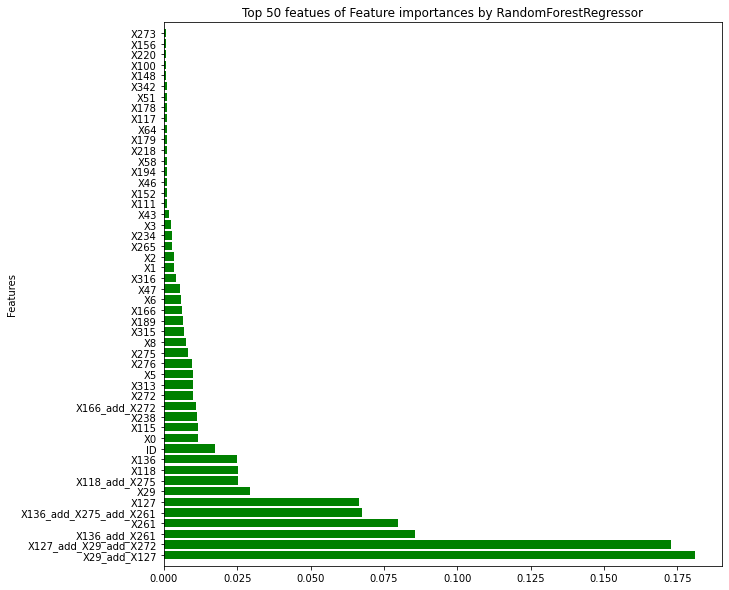

In [ ]:
model = RandomForestRegressor(n_estimators=250, max_depth=10, min_samples_leaf=3, max_features=0.2, n_jobs=-1, random_state=0)
model.fit(X_train_std_tech2,y_train)
feat_names = train_data.columns.values
importances = model.feature_importances_

indices = np.argsort(importances)[::-1][:50]
plt.subplots(figsize=(10,10))
plt.title("Top 50 featues of Feature importances by RandomForestRegressor")
plt.ylabel("Features")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), feat_names[indices], rotation='horizontal')
plt.ylim([-1, len(indices)])
plt.show()

### observations:

1.From the features important plot we can conclude that the two way and three way interactive features give more contributions in predicting the output variable.

2.Thus the ID features and categorical features are not giving much improtance in the predicting the values.

### Checking the feature importance through simple XGboostRegressor model

[04:12:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Top 50 features as Feature Importance by XGBoost


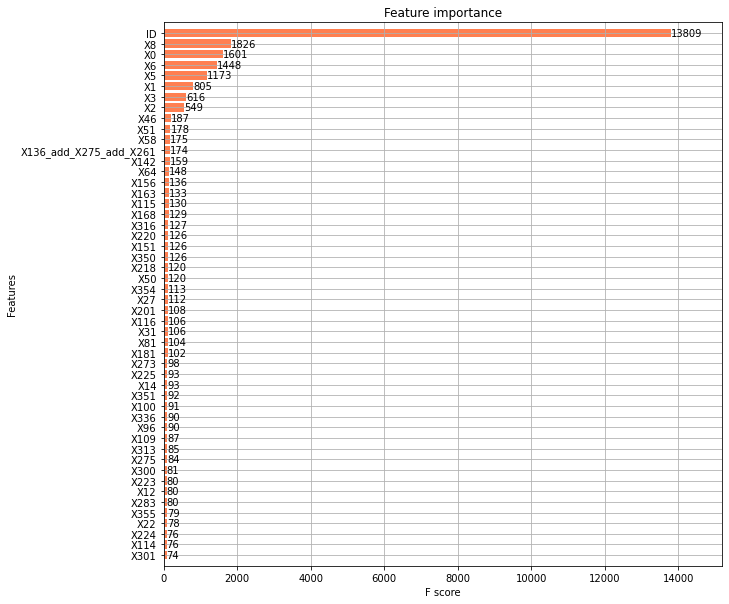

In [ ]:
def r2_score_xgb(preds, final):
 labels = dtrain.get_label()
 return r2_score(labels, preds)

xgb_params = {'n_trees': 500,'max_depth':5,'subsample': 0.98,'objective': 'reg:linear','eval_metric': 'rmse','base_score': np.mean(y_train)}
train = xgb.DMatrix(X_train_std_tech2,y_train, feature_names=train_data.columns.values)
model = xgb.train(dict(xgb_params), train, num_boost_round=1200, feval=r2_score_xgb, maximize=True)
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax,color = 'coral')
print("Top 50 features as Feature Importance by XGBoost")
plt.show()

### Observations:

1. By applying the Xgboost model checking the features importance the ID features and categorical features gives more importance in predicting the output variable.



## Model Implementation in Technique 2

1. Lasso Regression with Hyper parameter tuning

In [ ]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
param={"alpha":hyper_value}
model1=Lasso()
grid_cv = GridSearchCV(model1, param, cv=12, scoring='r2',return_train_score=True)
grid_cv.fit(X_train_std_tech2,y_train)

In [ ]:
result_df=pd.DataFrame(grid_cv.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

#### Plotting the Train Score and Test score

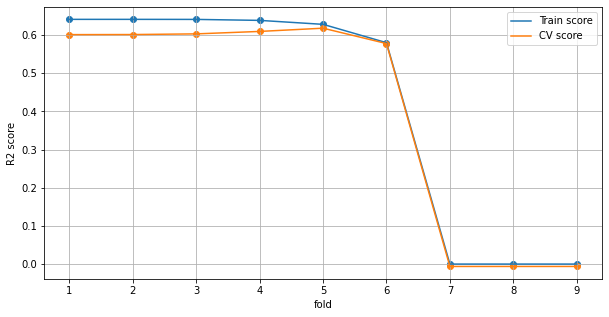

In [ ]:
fold= list(range(1,10))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("The best R2 score:",grid_cv.best_score_)
final_model=grid_cv.best_estimator_
final_model.fit(X_train_std_tech2,y_train)
predicted=final_model.predict(X_test_std_tech2)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech2_lasso1_submission.csv",index=False)

The best R2 score: 0.6182053677225127


#### 2. Linear SVM with kfold cross validation technique with Grid Search CV

In [ ]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10]
param={"C":hyper_value}
model1=SVR(kernel="linear")
grid_cv = GridSearchCV(model1, param, cv=3, scoring='r2',return_train_score=True)
grid_cv.fit(X_train_std_tech2,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [ ]:
result_df=pd.DataFrame(grid_cv.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

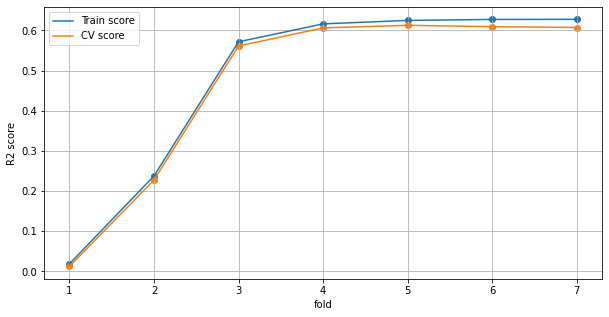

In [ ]:
fold= list(range(1,8))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("The best R2 score:",grid_cv.best_score_)
final_model=grid_cv.best_estimator_
final_model.fit(X_train_std_tech2,y_train)
predicted=final_model.predict(X_test_std_tech2)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech2_svr_submission.csv",index=False)

The best R2 score: 0.61294267864207


#### 3.Random forest with Grid search CV

In [ ]:
rf_reg=RandomForestRegressor(random_state=42,n_jobs=-1)
parameters = {'n_estimators':[20,30,40,50,60],
 'max_depth':[3,4,5,6,7],
 'min_samples_split':[2,3,4,5,6,7,8],
 'max_features': [0.95],
 'min_samples_leaf': [1,2,3,4,5,6,7],
 'random_state':[30,42]}
clf=GridSearchCV(rf_reg,parameters,cv=3,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(X_train_std_tech2,y_train)

Fitting 3 folds for each of 2450 candidates, totalling 7350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 2174 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 3038 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 3524 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | ela

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-

In [ ]:
print("The best score is :",clf.best_score_)
final_model=clf.best_estimator_
final_model.fit(X_train_std_tech2,y_train)
predicted=final_model.predict(X_test_std_tech2)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech2_rf1_submission.csv",index=False)

The best score is : 0.6259673725700797


#### 4. XGBoost Regressor with Grid Search CV

In [124]:
xgb_reg=XGBRegressor(n_jobs=-1)
parameters = {'n_estimators':[20,30,40,50,60],
 'max_depth':[2,3,4,5,6]}
XGB_reg=GridSearchCV(xgb_reg,parameters,cv=12,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
XGB_reg.fit(X_train_std_tech2,y_train)

Fitting 12 folds for each of 25 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


[05:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=12, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [20, 30, 40, 50, 60]},
             

In [126]:
print("The best R2 score:",XGB_reg.best_score_)
final_model=XGB_reg.best_estimator_
final_model.fit(X_train_std_tech2,y_train)
predicted=final_model.predict(X_test_std_tech2)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech2_XGB_submission.csv",index=False)

The best R2 score: 0.6357193275679882
[05:03:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [127]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["S.no.","Model","R2score","Private_score","Public_score"]
x.add_row(["1","Tech2_lasso","0.6182","0.54560","0.55151"])
x.add_row(["2","Tech2_linear_svm","0.6129","0.50748","0.51460"])
x.add_row(["3","Tech2_Random_forest","0.6259","0.54746","0.55409"])
x.add_row(["4","Tech2_Xgboost","0.6357","0.54653","0.55375"])

print(x)

+-------+---------------------+---------+---------------+--------------+
| S.no. |        Model        | R2score | Private_score | Public_score |
+-------+---------------------+---------+---------------+--------------+
|   1   |     Tech2_lasso     |  0.6182 |    0.54560    |   0.55151    |
|   2   |   Tech2_linear_svm  |  0.6129 |    0.50748    |   0.51460    |
|   3   | Tech2_Random_forest |  0.6259 |    0.54746    |   0.55409    |
|   4   |    Tech2_Xgboost    |  0.6357 |    0.54653    |   0.55375    |
+-------+---------------------+---------+---------------+--------------+


### Technique 3: Applying the SelectKbest algorithm to select top 100 features in the Technique 2

In [ ]:
select_k_best=SelectKBest(score_func=f_regression, k=100)
best_train=select_k_best.fit_transform(X_train_std_tech2,y_train)
best_test=select_k_best.transform(X_test_std_tech2)

### Making the top K best features dataset

In [ ]:
names = train_data.columns.values[select_k_best.get_support()]
scores = select_k_best.scores_[select_k_best.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
ns_df_sorted.head()

,Feat_names,F_Scores
0,X0,7259.988481
99,X127_add_X29_add_X272,5215.215434
96,X29_add_X127,4080.984717
94,X136_add_X261,3675.813580
98,X136_add_X275_add_X261,3322.394273


### Observations:

1.Thus by applying the Selectkbest features selection technique applied top 120 select features thus the  interactive features gives more importantance  in the predicting the output variable.

# Model Implementation

1.Lasso Regression with hyper-parameter tuning

In [ ]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
param={"alpha":hyper_value}
model1=Lasso(fit_intercept=True, normalize=False)
grid_cv = GridSearchCV(model1, param, cv=12, scoring='r2',return_train_score=True)
grid_cv.fit(best_train,y_train)

In [ ]:
result_df=pd.DataFrame(grid_cv.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

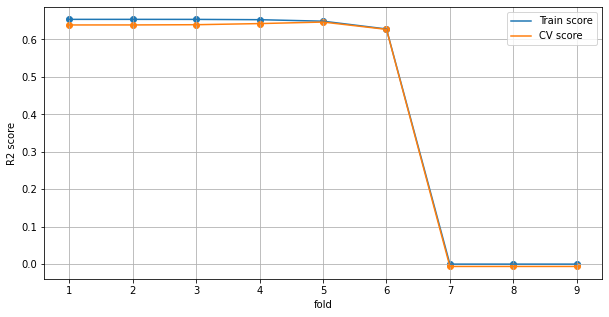

In [ ]:
fold= list(range(1,10))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("The best R2 score:",grid_cv.best_score_)

The best R2 score: 0.6465934712512222


In [ ]:
lasso_reg=grid_cv.best_estimator_
print("The best score:",grid_cv.best_score_)
lasso_reg.fit(best_train,y_train)
predicted=lasso_reg.predict(best_test)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech3_lasso_submission.csv",index=False)

The best score: 0.6465934712512222


#### 2. Linear SVM with hyper-parameter tuning

In [ ]:
hyper_value=[0.00001,0.0001,0.001,0.01,0.1,1,10]
param={"C":hyper_value}
model1=SVR(kernel="linear")
grid_cv = GridSearchCV(model1, param, cv=5, scoring='r2',return_train_score=True)
grid_cv.fit(best_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [ ]:
result_df=pd.DataFrame(grid_cv.cv_results_)
train_score=result_df["mean_train_score"]
cv_score=result_df["mean_test_score"]

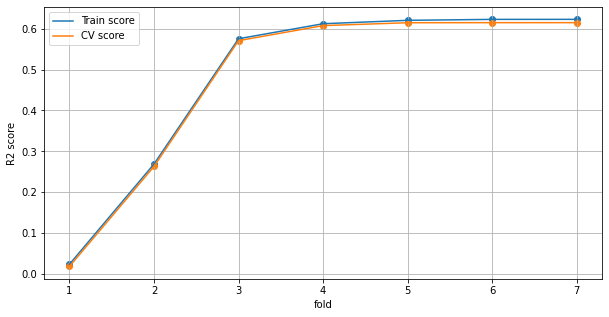

In [ ]:
fold= list(range(1,8))
plt.figure(figsize=(10,5))
plt.plot(fold,train_score,label='Train score')
plt.plot(fold,cv_score,label='CV score')
plt.scatter(fold,train_score)
plt.scatter(fold, cv_score)
plt.xlabel("fold")
plt.ylabel("R2 score")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("The best R2 score:",grid_cv.best_score_)
final_model=grid_cv.best_estimator_
final_model.fit(best_train,y_train)
predicted=final_model.predict(best_test)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech3_svm_submission.csv",index=False)

The best R2 score: 0.6146901890069592


#### 3. Random Forest with Grid search cv

In [ ]:
rf_reg=RandomForestRegressor(random_state=42,n_jobs=-1)
parameters = {'n_estimators':[20,30,40,50,60],
 'max_depth':[3,4,5,6,7]}
clf=GridSearchCV(rf_reg,parameters,cv=12,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(best_train,y_train)

Fitting 12 folds for each of 25 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


GridSearchCV(cv=12, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
print("The best R2 score:",clf.best_score_)
final_model=clf.best_estimator_
final_model.fit(best_train,y_train)
predicted=final_model.predict(best_test)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech3_rf_submission.csv",index=False)

The best R2 score: 0.6383369884161382


### 4. Xgboost Regressor  With Grid search cv

In [ ]:
xgb_reg=XGBRegressor(random_state=42,n_jobs=-1)
parameters = {'n_estimators':[20,30,40,50,60],
 'max_depth':[2,3,4,5,6]}
clf=GridSearchCV(xgb_reg,parameters,cv=12,scoring='r2',return_train_score=True,n_jobs=-1,verbose=5)
clf.fit(best_train,y_train)

Fitting 12 folds for each of 25 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


[21:26:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=12, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=-1, nthread=None,
                                    objective='reg:linear', random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [20, 30, 40, 50, 60]},
            

In [ ]:
print("The best R2 score:",clf.best_score_)
final_model=clf.best_estimator_
final_model.fit(best_train,y_train)
predicted=final_model.predict(best_test)
submission_df=pd.DataFrame()
submission_df["ID"]=test_data["ID"]
submission_df["y"]=predicted
submission_df.to_csv("tech3_xgb_submission.csv",index=False)

The best R2 score: 0.63996171253181
[21:28:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [128]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["S.no.","Model","R2score","Private_score","Public_score"]
x.add_row(["1","Tech3_lasso","0.64659","0.54643","0.55400"])
x.add_row(["2","Tech3_linear_svm","0.61469","0.50654","0.51980"])
x.add_row(["3","Tech3_Random_forest","0.6383","0.54641","0.55649"])
x.add_row(["4","Tech3_Xgboost","0.6399","0.54605","0.55224"])

print(x)

+-------+---------------------+---------+---------------+--------------+
| S.no. |        Model        | R2score | Private_score | Public_score |
+-------+---------------------+---------+---------------+--------------+
|   1   |     Tech3_lasso     | 0.64659 |    0.54643    |   0.55400    |
|   2   |   Tech3_linear_svm  | 0.61469 |    0.50654    |   0.51980    |
|   3   | Tech3_Random_forest |  0.6383 |    0.54641    |   0.55649    |
|   4   |    Tech3_Xgboost    |  0.6399 |    0.54605    |   0.55224    |
+-------+---------------------+---------+---------------+--------------+
